In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
root_dir = "../"
images_dir = os.path.join(root_dir,"data","processed_plots")
csv_path = os.path.join(root_dir,"labels","RP_SPX_label.csv" )

print(images_dir)

../data\processed_plots


In [3]:
from scipy.ndimage import imread

import os
import numpy as np

data = pd.read_csv(csv_path)
im_arr = list()
shape = (75,75)
size = data.shape[0]
print(size)
for i in range(size):
    img = imread(os.path.join(images_dir, str(i)+".jpg"))
    
#   Resize all image to the shape of the first image
    if shape == None:
        shape = img.shape
    im_arr.append(cv2.resize(img, shape))

im_arr = np.stack(im_arr)
labels = data['label']

3794


C:\Users\Pankaj Giri\Anaconda3\envs\final_project_new\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':


[-1  0  1]


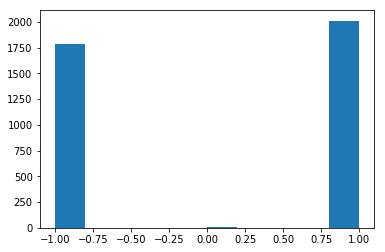

In [4]:
# check the distribution of labels

import matplotlib.pyplot as plt

print(np.unique(labels))
plt.hist(labels)
plt.show()

In [5]:
# Convert the 1D label to a 3D vector
def convert_labels(my_labels):
    result = list()
    for i in my_labels:
        if(i == -1):
            result.append(np.array([1,0,0]))
        elif(i == 0):
            result.append(np.array([0,1,0]))
        else:
            result.append(np.array([0,0,1]))
    return result 


labels = np.array(convert_labels(labels))
print(labels.shape)
(X, y) = im_arr, labels
print(np.unique(y))

(3794, 3)
[0 1]


CNN

In [6]:
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


kernel_size = 3

model = Sequential()

model.add(Conv2D(32, (kernel_size, kernel_size), padding="same", input_shape=(75,75,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (kernel_size, kernel_size), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
BatchNormalization(axis=-1)

model.add(Conv2D(64,(kernel_size, kernel_size), padding="same"))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (kernel_size, kernel_size), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'softmax'))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

C:\Users\Pankaj Giri\Anaconda3\envs\final_project_new\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 38, 38, 64)        0         
__________

Convert the data into 4D tensor before feeding into the network

In [8]:
X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X_train = X_train.astype('float32')
X_train/=255
print(X_train.shape)
y_train = y
print(y_train.shape)

(3794, 75, 75, 1)
(3794, 3)


In [8]:
# Train the model
model.fit(X_train[0:2000], y_train[0:2000], batch_size=50, epochs=5, validation_data=(X_train[2001:2500], y_train[2001:2500]), shuffle=True)

Train on 2000 samples, validate on 499 samples
Epoch 1/5
2000/2000 [==============================] - 77s 38ms/step - loss: 0.9792 - acc: 0.4935 - val_loss: 0.9634 - val_acc: 0.4409

In [12]:
# Evaluate on the test data
scores = model.evaluate(X_train[2501:3794], y_train[2501:3794])
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1293/1293 [==============================] - 15s 12ms/step

Model checkpoint 1

In [11]:
# model.save('./model_ravis_rp_older.ckpt')
# model.load_weights('../models/model_ravis_rp_29May2018.ckpt')

Model checkpoint 2

In [14]:
# model.save('./model_ravis_rp_29May2018.ckpt')
# model.load_weights('./model_ravis_rp_29May2018.ckpt')